<a href="https://colab.research.google.com/github/karlgelbjerg/Econ-model-session-11-12/blob/main/Karl_Gelbjerg_Data_Modeling_Session_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Data Modeling - Session 11 </center>
<img src="https://datasemantics.co/wp-content/uploads/2021/01/it-heads-guide-to-data-modelling.jpg">


<br/><br/><br/>
![](https://learning.esri.es/wp-content/uploads/2016/10/main-improved-decision-making.gif)



# Regression

![](https://www.tibco.com/sites/tibco/files/media_entity/2020-09/regression-analysis-diagram.svg)

Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

There are several types of regression techniques available, each with its own strengths and limitations.



## Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable (or response variable) and one or more independent variables (or explanatory variables). In the simplest case, when there is only one independent variable, it is called simple linear regression. When there are multiple independent variables, it is called multiple linear regression. The goal of linear regression is to find the best-fitting line (in simple linear regression) or hyperplane (in multiple linear regression) that describes the relationship between the dependent and independent variables.

The linear regression model can be represented as:

y = β0 + β1 * x1 + β2 * x2 + ... + βn * xn + ε

where:

- y is the dependent variable.
- x1, x2, ..., xn are the independent variables.
- β0, β1, ..., βn are the coefficients of the model, with β0 being the intercept.
- ε is the error term, representing the difference between the predicted and actual values.

Examples of linear regression:

1. Predicting house prices based on the size, number of bedrooms, and age of the house.
2. Forecasting sales for a company based on advertising budget and economic indicators.
3. Estimating the fuel efficiency of a car based on its weight and horsepower.

## Linear Least Squares

Linear least squares is a mathematical optimization technique that aims to find the best-fitting linear relationship between a set of data points. It does this by minimizing the sum of the squared differences between the predicted values (based on the linear relationship) and the actual data points.

In the context of linear regression, we try to find a line, y = mx + b, where m is the slope and b is the y-intercept, that best fits our data points.




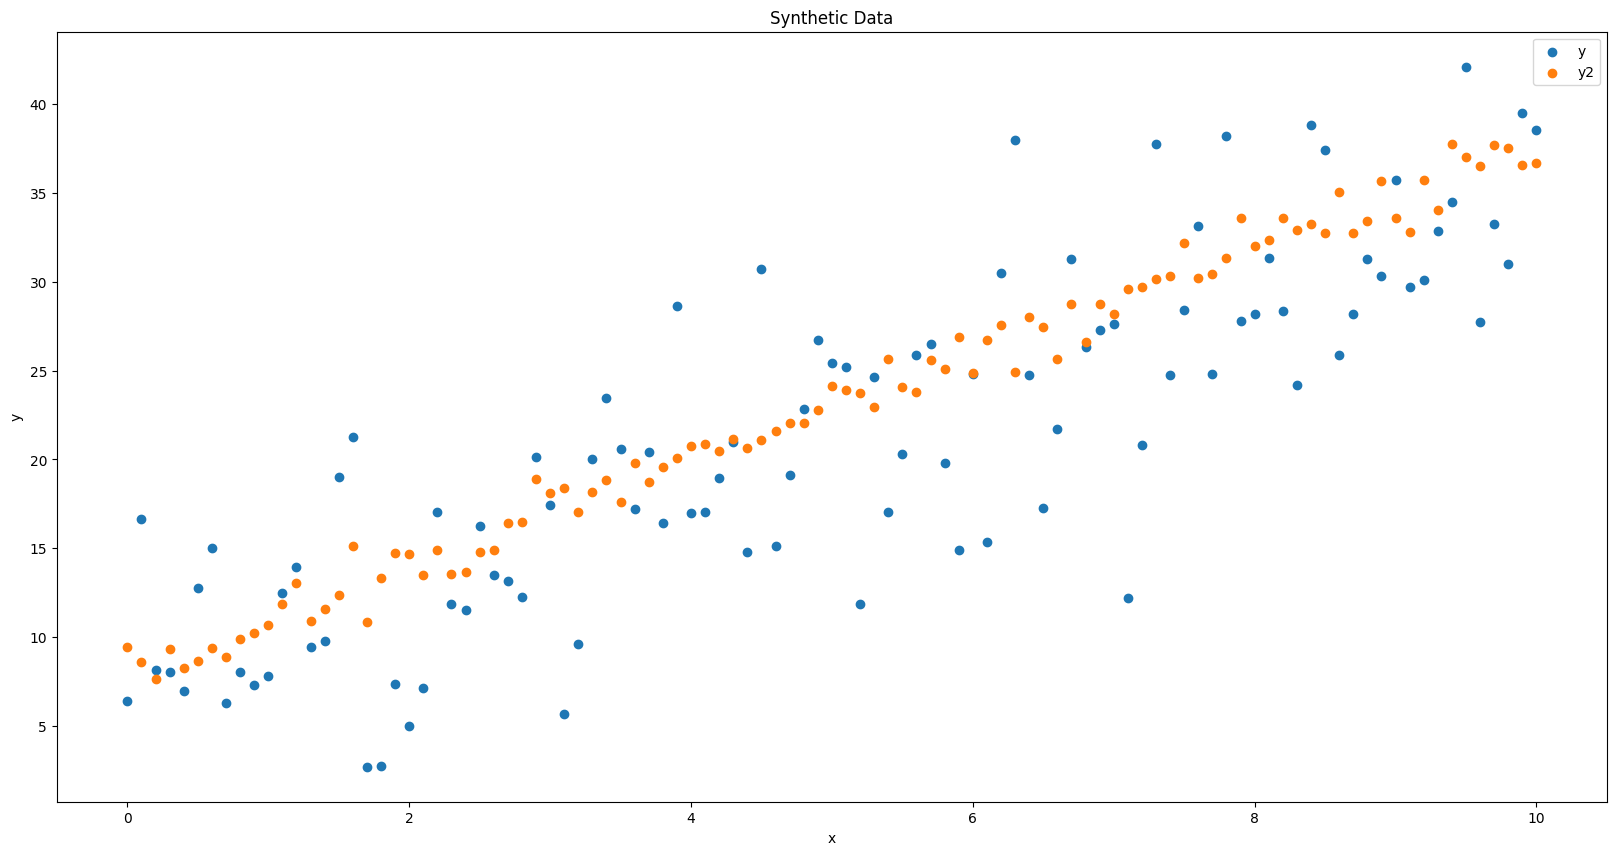

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
# np.random.seed(0)
x = np.linspace(0, 10, 101)
y = 3 * x + 6 + np.random.normal(0, 5, 101)
y2 = 3 * x + 3 + np.random.normal(5 , 1, 101)

# y = 3 * x + 3


# Plot the data points
plt.figure(figsize=(20,10))
plt.scatter(x, y, label='y')
plt.scatter(x, y2, label='y2')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()

In [ ]:
# Solving for m and b using the normal equations
A = np.vstack([x, np.ones(len(x))]).T # The design matrix
print(A)
m, b = np.linalg.lstsq(A, y, rcond=None)[0]

# Print the values of m and b
print(f"m = {m:.4f}, b = {b:.4f}")

[[ 0.   1. ]
 [ 0.1  1. ]
 [ 0.2  1. ]
 [ 0.3  1. ]
 [ 0.4  1. ]
 [ 0.5  1. ]
 [ 0.6  1. ]
 [ 0.7  1. ]
 [ 0.8  1. ]
 [ 0.9  1. ]
 [ 1.   1. ]
 [ 1.1  1. ]
 [ 1.2  1. ]
 [ 1.3  1. ]
 [ 1.4  1. ]
 [ 1.5  1. ]
 [ 1.6  1. ]
 [ 1.7  1. ]
 [ 1.8  1. ]
 [ 1.9  1. ]
 [ 2.   1. ]
 [ 2.1  1. ]
 [ 2.2  1. ]
 [ 2.3  1. ]
 [ 2.4  1. ]
 [ 2.5  1. ]
 [ 2.6  1. ]
 [ 2.7  1. ]
 [ 2.8  1. ]
 [ 2.9  1. ]
 [ 3.   1. ]
 [ 3.1  1. ]
 [ 3.2  1. ]
 [ 3.3  1. ]
 [ 3.4  1. ]
 [ 3.5  1. ]
 [ 3.6  1. ]
 [ 3.7  1. ]
 [ 3.8  1. ]
 [ 3.9  1. ]
 [ 4.   1. ]
 [ 4.1  1. ]
 [ 4.2  1. ]
 [ 4.3  1. ]
 [ 4.4  1. ]
 [ 4.5  1. ]
 [ 4.6  1. ]
 [ 4.7  1. ]
 [ 4.8  1. ]
 [ 4.9  1. ]
 [ 5.   1. ]
 [ 5.1  1. ]
 [ 5.2  1. ]
 [ 5.3  1. ]
 [ 5.4  1. ]
 [ 5.5  1. ]
 [ 5.6  1. ]
 [ 5.7  1. ]
 [ 5.8  1. ]
 [ 5.9  1. ]
 [ 6.   1. ]
 [ 6.1  1. ]
 [ 6.2  1. ]
 [ 6.3  1. ]
 [ 6.4  1. ]
 [ 6.5  1. ]
 [ 6.6  1. ]
 [ 6.7  1. ]
 [ 6.8  1. ]
 [ 6.9  1. ]
 [ 7.   1. ]
 [ 7.1  1. ]
 [ 7.2  1. ]
 [ 7.3  1. ]
 [ 7.4  1. ]
 [ 7.5  1. ]
 [ 7.6  1. ]

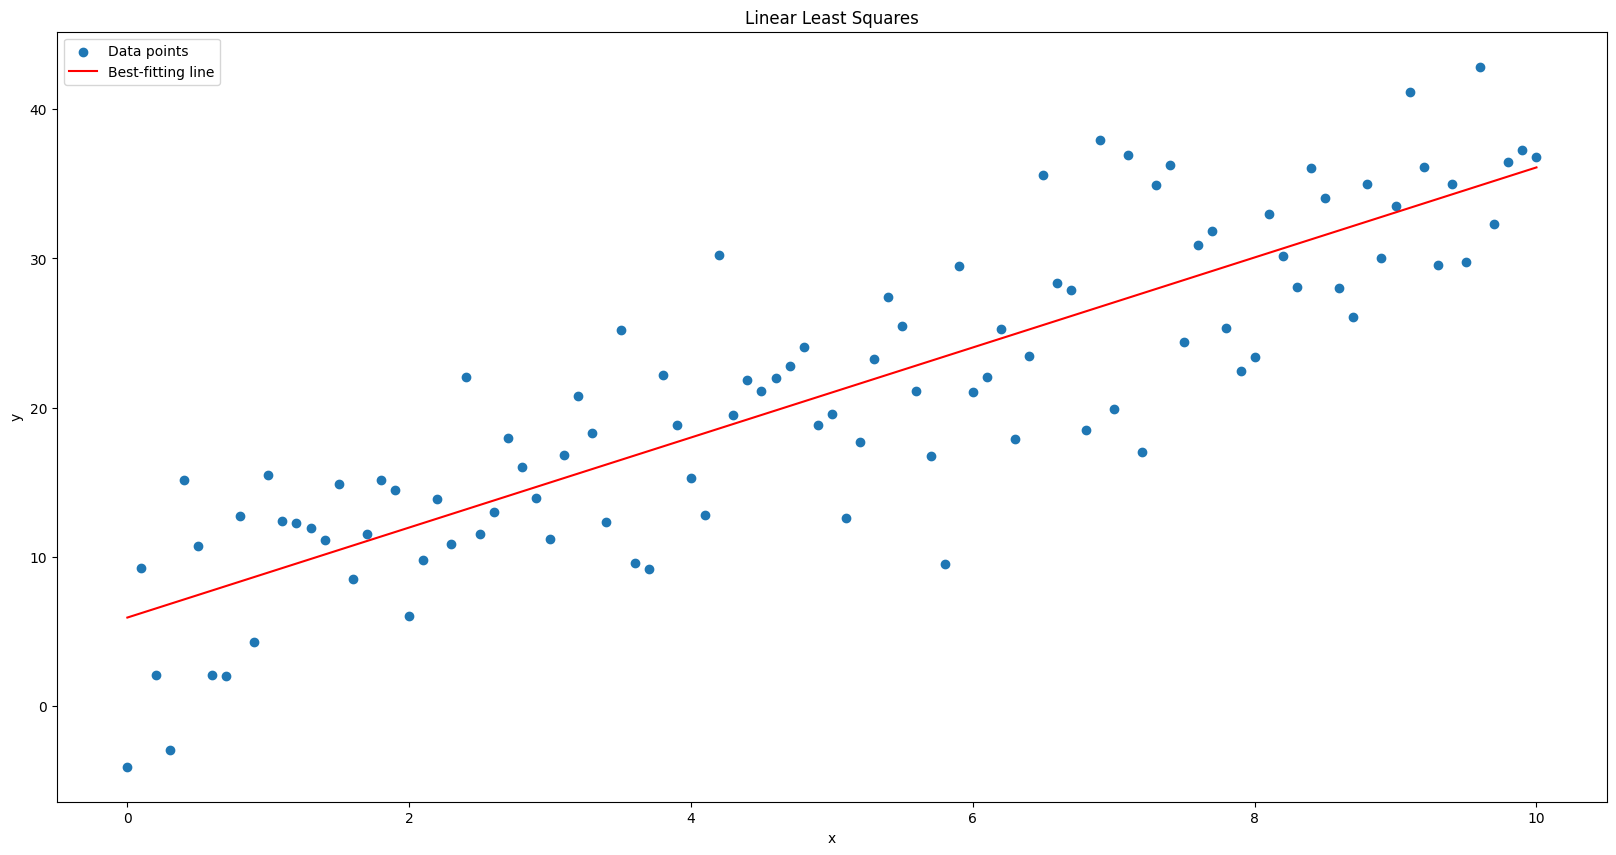

In [ ]:
# Plot the best-fitting line
plt.figure(figsize=(20,10))
y_pred = m * x + b
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred, color='red', label='Best-fitting line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Least Squares')
plt.legend()
plt.show()

## Simple practical example:

Determine the price of a house based on the surface and some data.

Intercept: -23635.46310054476, Coefficient: 1250.1238236750864


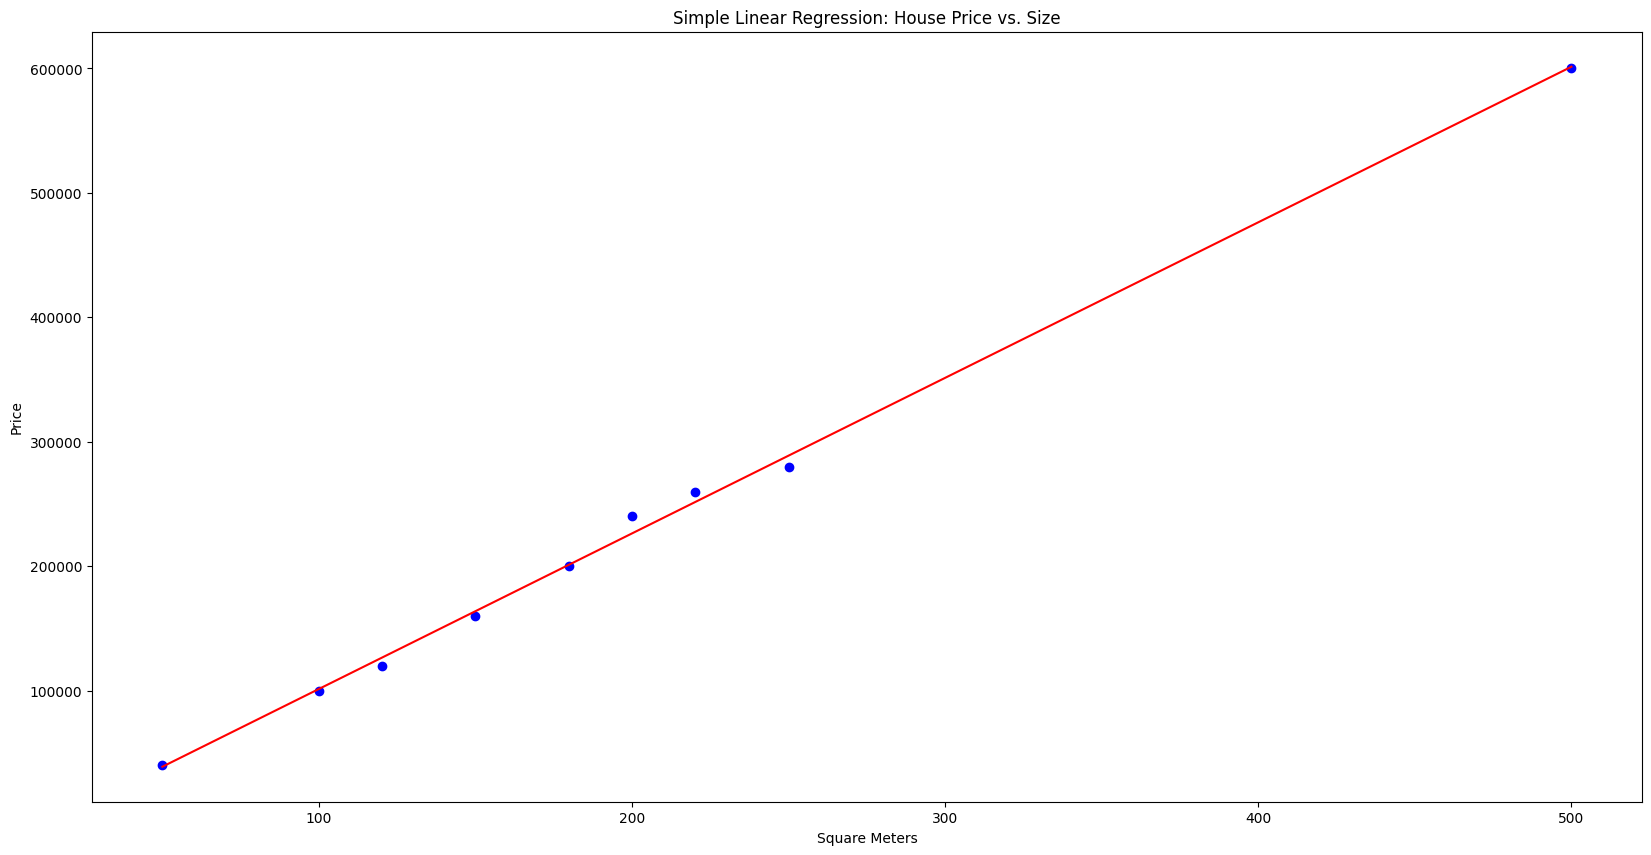

351401.68400198116


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (square_feet, price)
data = np.array([
    [50, 40000],
    [100, 100000],
    [120, 120000],
    [150, 160000],
    [180, 200000],
    [200, 240000],
    [220, 260000],
    [250, 280000],
    [500, 600000]
])

# Convert the data to a DataFrame
df = pd.DataFrame(data, columns=['Square Meters', 'Price'])

# Calculate the mean of the independent and dependent variables
X_mean = df['Square Meters'].mean()
y_mean = df['Price'].mean()

# Calculate the coefficients
numerator = np.sum((df['Square Meters'] - X_mean) * (df['Price'] - y_mean))
denominator = np.sum((df['Square Meters'] - X_mean)**2)
m = numerator / denominator
b = y_mean - m * X_mean

# Print the coefficients
print(f"Intercept: {b}, Coefficient: {m}")

# Plot the data points and the fitted line
plt.figure(figsize=(20,10))
plt.scatter(df['Square Meters'], df['Price'], color='blue')
plt.plot(df['Square Meters'], m * df['Square Meters'] + b, color='red')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.title('Simple Linear Regression: House Price vs. Size')
plt.show()
house_300 = 300*m + b
print(house_300)


Intercept: -23635.4631005449, Coefficient: 1250.1238236750871


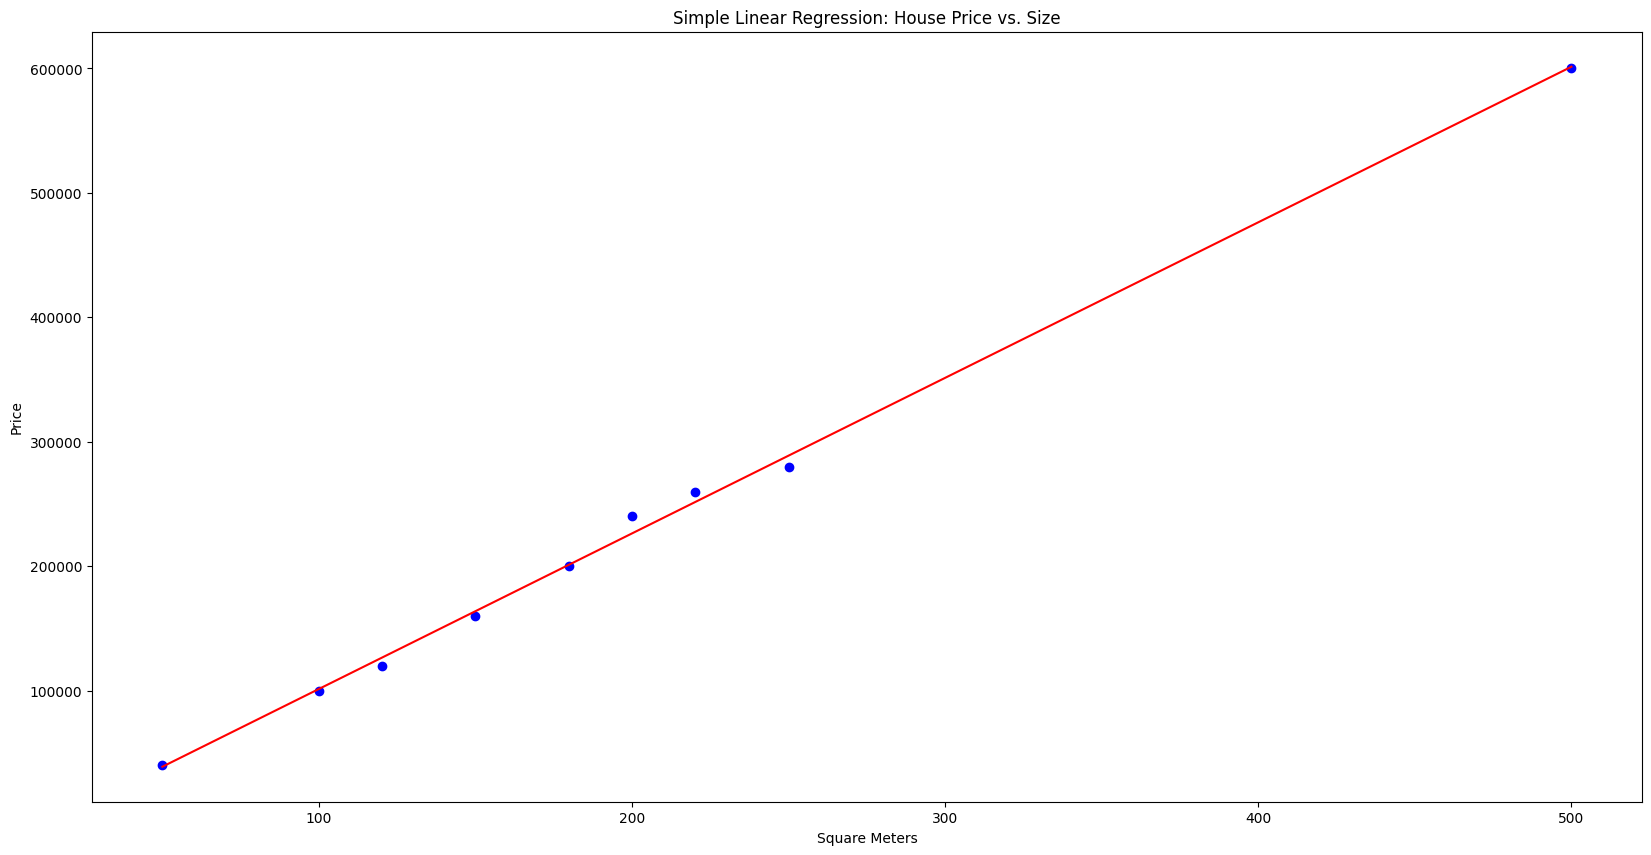

351401.6840019813


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = np.array([
    [50, 40000],
    [100, 100000],
    [120, 120000],
    [150, 160000],
    [180, 200000],
    [200, 240000],
    [220, 260000],
    [250, 280000],
    [500, 600000]
])

# Convert to DataFrame for ease of manipulation
df = pd.DataFrame(data, columns=['Square Meters', 'Price'])

# Using the matrix method
A = np.vstack([df['Square Meters'], np.ones(len(df))]).T
m, b = np.linalg.lstsq(A, df['Price'], rcond=None)[0]

# Print the coefficients
print(f"Intercept: {b}, Coefficient: {m}")

# Plot the data points and the fitted line
plt.figure(figsize=(20, 10))
plt.scatter(df['Square Meters'], df['Price'], color='blue')
plt.plot(df['Square Meters'], m * df['Square Meters'] + b, color='red')
plt.xlabel('Square Meters')
plt.ylabel('Price')
plt.title('Simple Linear Regression: House Price vs. Size')
plt.show()

# Predicting the house price for 300 square meters
house_300 = 300 * m + b
print(house_300)


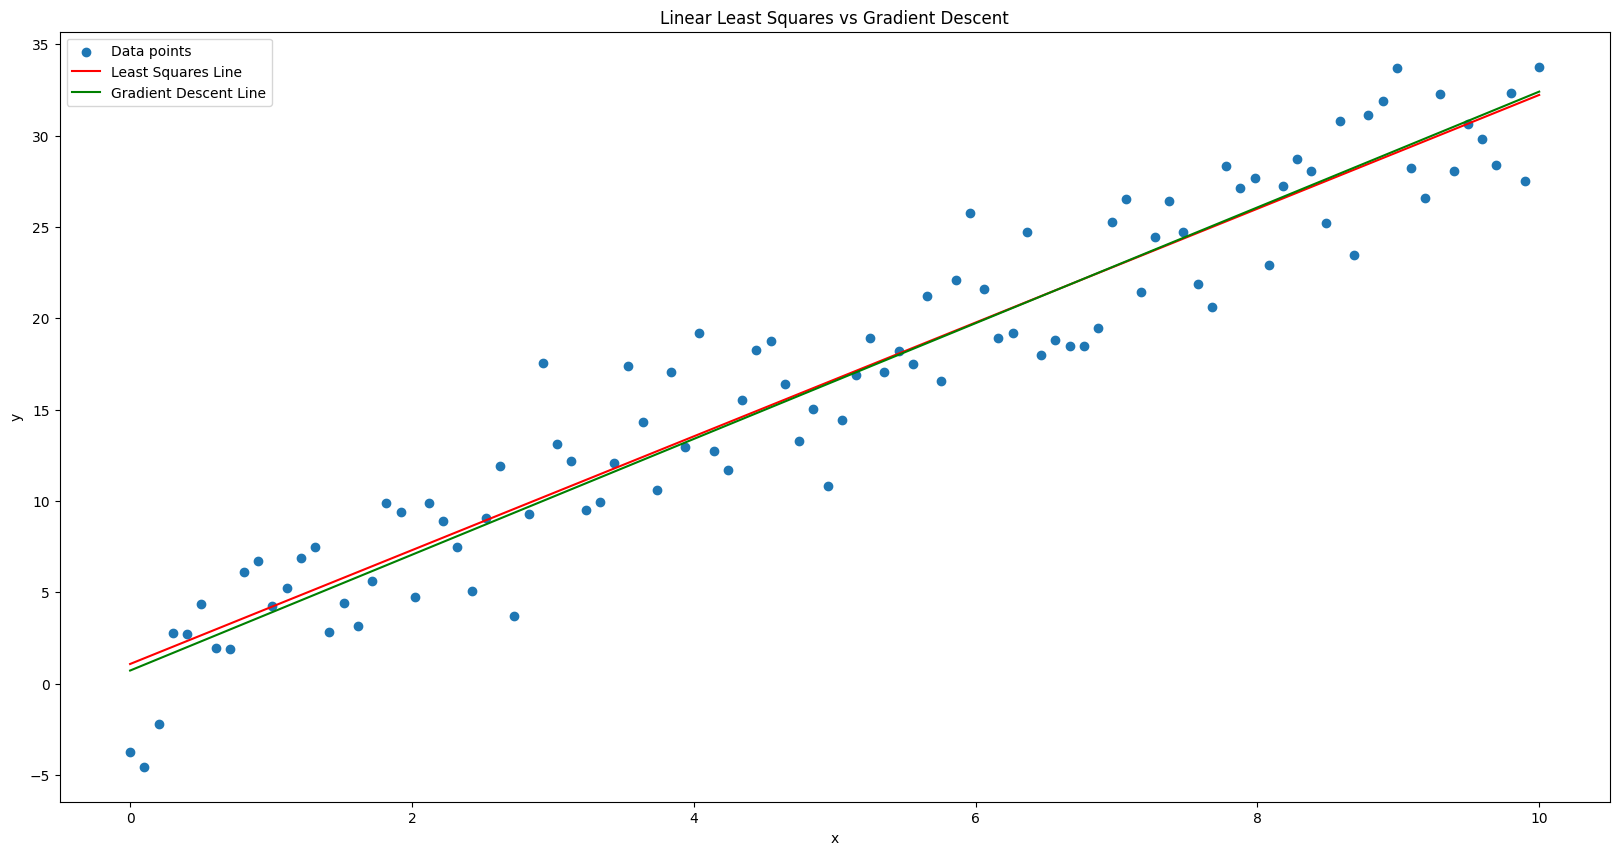

Least Squares: m = 3.12, b = 1.07
Gradient Descent: m = 3.17, b = 0.71


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, learning_rate=0.01, epochs=10):
    m, b = 0.0, 0.0
    n = len(x)

    for _ in range(epochs):
        y_pred = m * x + b
        dm = (-2/n) * np.sum(x * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)
        m -= learning_rate * dm
        b -= learning_rate * db

    return m, b

# Generate synthetic data
# np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 3, 100)

# Linear least squares solution
A = np.vstack([x, np.ones(len(x))]).T
m_ls, b_ls = np.linalg.lstsq(A, y, rcond=None)[0]

# Gradient descent solution
m_gd, b_gd = gradient_descent(x, y, 0.01, 100)

# Plot the data points, least squares line, and gradient descent line
y_pred_ls = m_ls * x + b_ls
y_pred_gd = m_gd * x + b_gd

plt.figure(figsize=(20,10))
plt.scatter(x, y, label='Data points')
plt.plot(x, y_pred_ls, color='red', label='Least Squares Line')
plt.plot(x, y_pred_gd, color='green', label='Gradient Descent Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Least Squares vs Gradient Descent')
plt.legend()
plt.show()

print(f"Least Squares: m = {m_ls:.2f}, b = {b_ls:.2f}")
print(f"Gradient Descent: m = {m_gd:.2f}, b = {b_gd:.2f}")

Epoch 1: Cost = 365.1019, m = 2.1808, b = 0.3341
Epoch 2: Cost = 45.0668, m = 2.8670, b = 0.4435
Epoch 3: Cost = 13.3220, m = 3.0825, b = 0.4820
Epoch 4: Cost = 10.1702, m = 3.1498, b = 0.4982
Epoch 5: Cost = 9.8543, m = 3.1703, b = 0.5074
Epoch 6: Cost = 9.8197, m = 3.1762, b = 0.5143
Epoch 7: Cost = 9.8131, m = 3.1774, b = 0.5205
Epoch 8: Cost = 9.8093, m = 3.1772, b = 0.5265
Epoch 9: Cost = 9.8057, m = 3.1766, b = 0.5324
Epoch 10: Cost = 9.8023, m = 3.1758, b = 0.5382
Epoch 11: Cost = 9.7988, m = 3.1749, b = 0.5440
Epoch 12: Cost = 9.7954, m = 3.1741, b = 0.5497
Epoch 13: Cost = 9.7921, m = 3.1732, b = 0.5554
Epoch 14: Cost = 9.7887, m = 3.1723, b = 0.5611
Epoch 15: Cost = 9.7854, m = 3.1715, b = 0.5668
Epoch 16: Cost = 9.7822, m = 3.1707, b = 0.5724
Epoch 17: Cost = 9.7789, m = 3.1698, b = 0.5780
Epoch 18: Cost = 9.7757, m = 3.1690, b = 0.5836
Epoch 19: Cost = 9.7726, m = 3.1681, b = 0.5891
Epoch 20: Cost = 9.7694, m = 3.1673, b = 0.5946


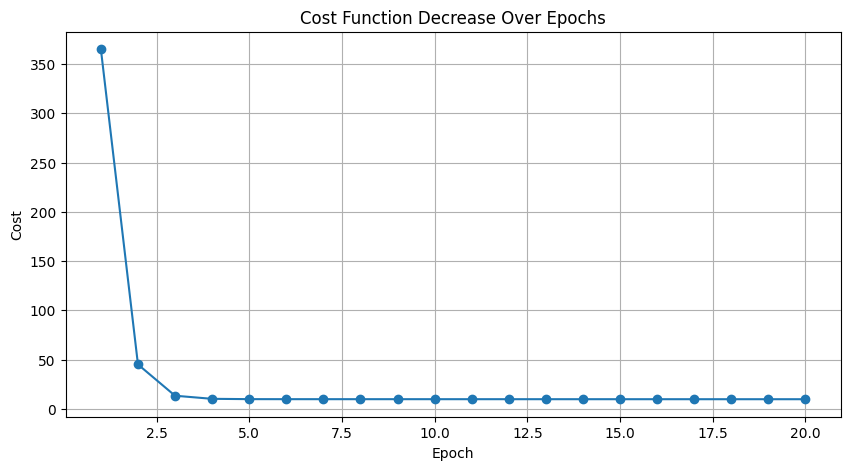

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, learning_rate=0.01, epochs=10):
    m, b = 0.0, 0.0
    n = len(x)
    cost_history = []  # To store the cost at each epoch

    for epoch in range(epochs):
        y_pred = m * x + b
        cost = np.mean((y - y_pred) ** 2)  # Calculate MSE
        cost_history.append(cost)

        dm = (-2/n) * np.sum(x * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)
        m -= learning_rate * dm
        b -= learning_rate * db

        print(f"Epoch {epoch+1}: Cost = {cost:.4f}, m = {m:.4f}, b = {b:.4f}")

    return m, b, cost_history

# Generate synthetic data
x = np.linspace(0, 10, 100)
y = 3 * x + 2 + np.random.normal(0, 3, 100)

# Perform gradient descent
m_gd, b_gd, costs = gradient_descent(x, y, learning_rate=0.01, epochs=20)

# Plotting the cost history
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), costs, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function Decrease Over Epochs')
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


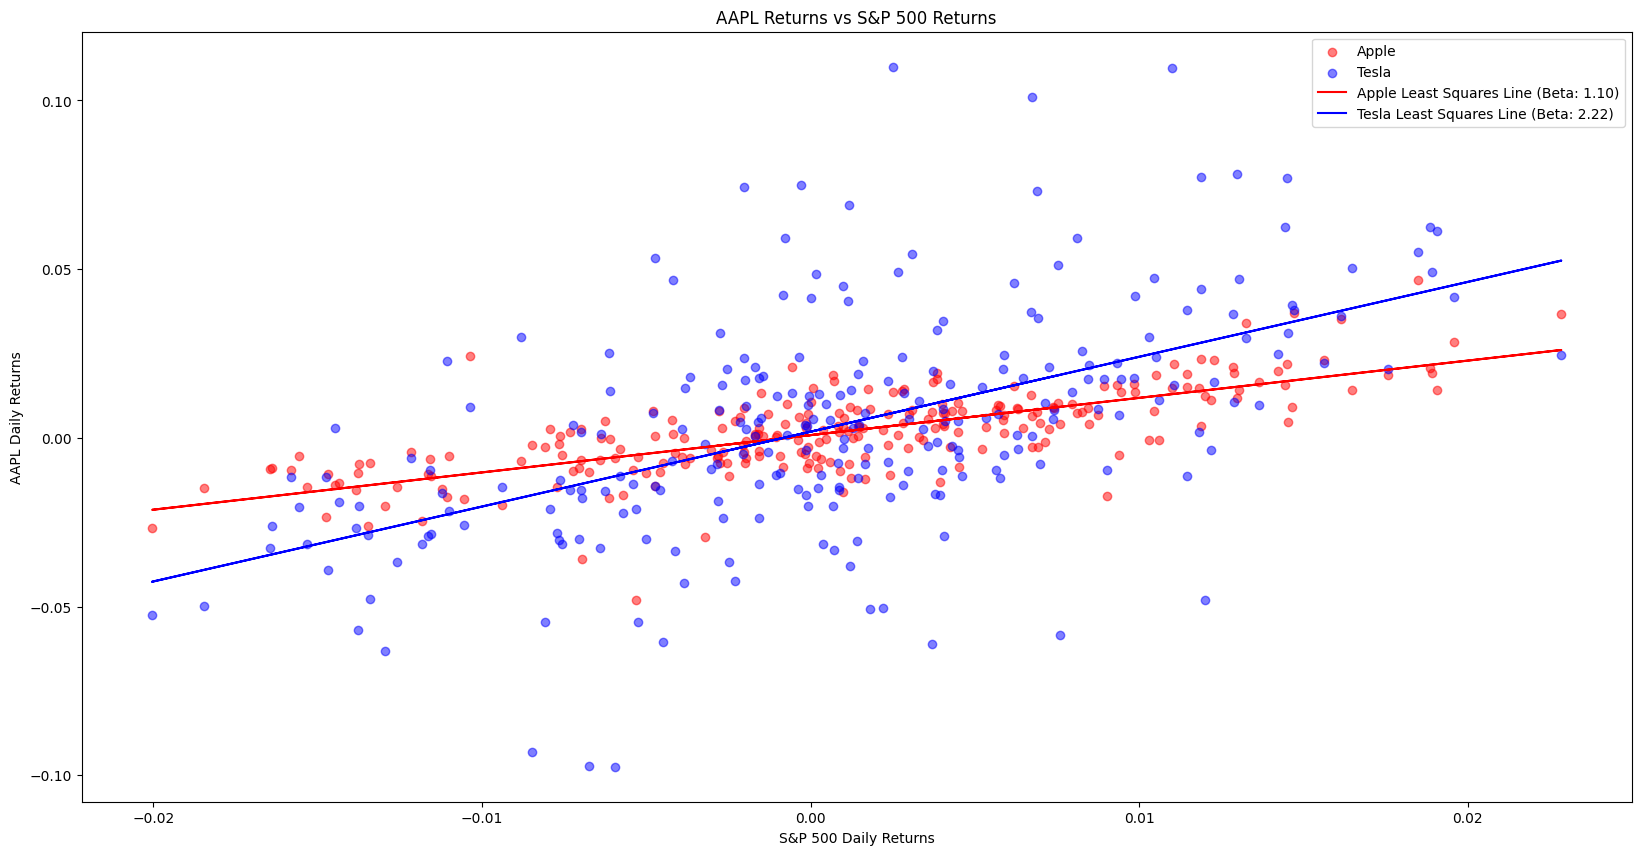

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical price data for Apple Inc. (AAPL) and the S&P 500 index
start_date = '2023-01-01'
# start_date = '2021-12-01'
end_date = '2023-12-31'
aapl = yf.download('AAPL', start=start_date, end=end_date)['Adj Close']
tsla = yf.download('TSLA', start=start_date, end=end_date)['Adj Close']
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
aapl_returns = aapl.pct_change().dropna()
tsla_returns = tsla.pct_change().dropna()
sp500_returns = sp500.pct_change().dropna()

# Prepare data for linear least squares
x = sp500_returns.values
y = aapl_returns.values
y2 = tsla_returns.values

# Add a constant term for the intercept
A = np.vstack([x, np.ones(len(x))]).T

# Perform linear least squares
m, b = np.linalg.lstsq(A, y, rcond=None)[0]
m2, b2 = np.linalg.lstsq(A, y2, rcond=None)[0]

plt.figure(figsize=(20, 10))
# Plot the data points and the best-fitting line
plt.scatter(x, y, label='Apple', alpha=0.5, color='red')
plt.scatter(x, y2, label='Tesla', alpha=0.5, color='blue')
plt.plot(x, m * x + b, color='red', label=f'Apple Least Squares Line (Beta: {m:.2f})')
plt.plot(x, m2 * x + b2, color='blue', label=f'Tesla Least Squares Line (Beta: {m2:.2f})')
plt.xlabel('S&P 500 Daily Returns')
plt.ylabel('AAPL Daily Returns')
plt.title('AAPL Returns vs S&P 500 Returns')
plt.legend()

plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download the list of S&P 500 constituents
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
tickers = table["Symbol"].tolist()

# Download historical price data for S&P 500 constituents and the S&P 500 index
start_date = "2023-01-01"
end_date = "2023-12-31"
price_data = yf.download(tickers, start=start_date, end=end_date, group_by="ticker")
price_data.to_csv("sample_data/sp.csv")


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['GEV', 'SOLV']: Exception("%ticker%: Data doesn't exist for startDate = 1672549200, endDate = 1703998800")
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-01-01 -> 2023-12-31)')


In [ ]:
import pandas as pd

# Sample MultiIndex DataFrame
index = pd.MultiIndex.from_tuples([('A', 1), ('A', 2), ('B', 1), ('B', 2)], names=['Letter', 'Number'])
data = pd.DataFrame({'Value': [10, 20, 30, 40]}, index=index)

print("Original DataFrame:")
print(data)

# Using xs() to select data
selected_data = data.xs(key=1, level='Number', drop_level=True)

print("\nSelected data using xs():")
print(selected_data)

selected_data = data.xs(key=1, level='Number', drop_level=False)
print("\nSelected data using xs():")
print(selected_data)


Original DataFrame:
               Value
Letter Number       
A      1          10
       2          20
B      1          30
       2          40

Selected data using xs():
        Value
Letter       
A          10
B          30

Selected data using xs():
               Value
Letter Number       
A      1          10
B      1          30


In [ ]:
# price_data = pd.read_csv("sample_data/sp.csv")
price_data = pd.read_csv("sample_data/sp.csv", header=[0, 1], index_col=0)
# Set the 'Date' column as the index
price_data.index = pd.to_datetime(price_data.index)

# Extract the 'Adj Close' data for each stock
adj_close_data = price_data.xs("Adj Close", axis=1, level=1, drop_level=False)

# Remove companies with missing 'Adj Close' data
adj_close_data = adj_close_data.dropna(axis=1)

adj_close_data

Ticker,NKE,LH,EFX,WY,MRNA,TRGP,SPGI,AOS,RF,EMR,...,ZBRA,UPS,REGN,LYB,ADM,MSFT,HRL,KLAC,MTB,ITW
Price,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,...,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,116.817268,200.972916,196.539017,29.029303,178.990005,68.605347,331.268005,57.627884,20.198946,93.393959,...,260.200012,166.706848,720.469971,78.691330,86.800789,237.036011,43.724983,371.210846,138.041092,214.357834
2023-01-04,119.237228,202.595703,202.782745,29.377350,177.360001,68.974358,337.642914,59.329723,20.612900,92.723457,...,262.989990,168.447327,726.489990,80.480835,83.644394,226.667282,43.858784,374.838715,139.583664,214.844315
2023-01-05,118.656837,202.823898,196.330872,28.502520,173.509995,68.877243,332.167419,58.077801,20.387106,92.325043,...,260.059998,165.337265,723.760010,81.445862,81.553047,219.949371,44.011707,368.174561,139.250381,212.956818
2023-01-06,122.503197,205.401779,202.792648,29.734812,180.350006,70.984444,343.790527,60.092621,21.064482,95.181969,...,273.420013,170.197342,737.150024,84.415871,83.218376,222.541550,44.833641,391.952545,143.011597,220.808441
2023-01-09,122.817986,205.765228,202.812485,29.556084,183.949997,72.751778,346.261414,60.141529,20.782242,94.511467,...,279.290009,172.803314,680.489990,85.577644,82.656815,224.708298,44.049934,402.540253,141.449997,220.818146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,107.655373,223.284027,243.509949,34.016365,94.889999,86.208664,433.937134,81.409691,19.020954,95.963432,...,269.410004,156.495026,846.719971,94.862595,70.790520,373.888580,31.222210,581.357910,135.249969,259.145569
2023-12-26,107.635437,224.609665,247.194351,34.283665,97.330002,87.043816,435.324249,81.529213,19.317076,97.038086,...,275.500000,156.277466,849.530029,95.474869,71.711807,373.968445,31.271362,590.058533,137.568192,260.946381


### Understanding Covariance and the Covariance Matrix

**Covariance** measures the directional relationship between the returns on two assets. If the assets tend to move together, the covariance is positive. If they tend to move inversely, the covariance is negative.

- **Formula for Covariance**:
  $$
  \text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
  $$
  where \(X\) and \(Y\) are two random variables (here, stock and market returns), \(\bar{X}\) and \(\bar{Y}\) are their means, and \(n\) is the number of observations.

**Covariance Matrix**: In statistics and probability theory, a covariance matrix is a matrix containing the covariances corresponding to all possible pairs of the variables being studied. In the case of calculating beta:

- The matrix is typically a 2x2 matrix when examining a stock and the market:
  $$
  \begin{bmatrix}
    \text{Var}(R_s) & \text{Cov}(R_s, R_m) \\
    \text{Cov}(R_m, R_s) & \text{Var}(R_m)
  \end{bmatrix}
  $$
  where \(R_s\) and \(R_m\) represent the returns of the stock and the market, respectively.
  
  - **Top-left corner** (\(\text{Var}(R_s)\)): Variance of the stock's returns.
  - **Bottom-right corner** (\(\text{Var}(R_m)\)): Variance of the market's returns.
  - **Off-diagonal elements** (\(\text{Cov}(R_s, R_m)\) and \(\text{Cov}(R_m, R_s)\)): These values are identical and represent the covariance between the stock’s returns and the market’s returns.

### Calculating Beta from the Covariance Matrix

- **Beta Calculation**:
  $$
  \beta = \frac{\text{Cov}(R_s, R_m)}{\text{Var}(R_m)}
  $$
  - This formula uses the covariance between the stock's returns and the market's returns divided by the variance of the market's returns. It quantifies the sensitivity of the stock's returns relative to market returns.

### How Beta Is Used

- **Financial Interpretation**: Beta is a measure of a stock's volatility relative to the market. A beta greater than 1 indicates that the stock is more volatile than the market, while a beta less than 1 indicates that the stock is less volatile.
- **Risk Management**: Investors use beta to gauge a stock's risk relative to the market and to diversify their portfolios. High-beta stocks are expected to yield higher returns in bullish markets but pose greater risks during downturns.


In [ ]:
import pandas as pd

# Load the historical price data from the CSV file
price_data = pd.read_csv("sample_data/sp.csv", header=[0, 1], index_col=0)

# Set the 'Date' column as the index
price_data.index = pd.to_datetime(price_data.index)

# Extract the 'Adj Close' data for each stock
adj_close_data = price_data.xs("Adj Close", axis=1, level=1, drop_level=False)

# Remove companies with missing 'Adj Close' data
adj_close_data = adj_close_data.dropna(axis=1)

print(adj_close_data.head())

sp500 = yf.download("^GSPC", start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
returns_data = adj_close_data.pct_change().dropna()
sp500_returns = sp500.pct_change().dropna()

# Calculate beta values for each stock
beta_values = {}
for ticker in adj_close_data.columns:
    try:
        stock_returns = returns_data[ticker]
        cov_matrix = np.cov(stock_returns, sp500_returns)
        beta = cov_matrix[0, 1] / cov_matrix[1, 1]
        beta_values[ticker] = beta
    except:
        print(f"Error calculating beta for {ticker}")

# Find the top 5 stocks with the highest beta
sorted_beta_values = sorted(beta_values.items(), key=lambda x: x[1], reverse=True)

print("Top S&P 500 stocks with the highest/lowest beta in 2023:")
for stock, beta in sorted_beta_values[:10]+sorted_beta_values[-10:]:
    print(f"{stock}: {beta:.2f}")

[*********************100%%**********************]  1 of 1 completed

Ticker             NKE          LH         EFX         WY        MRNA  \
Price        Adj Close   Adj Close   Adj Close  Adj Close   Adj Close   
Date                                                                    
2023-01-03  116.817268  200.972916  196.539017  29.029303  178.990005   
2023-01-04  119.237228  202.595703  202.782745  29.377350  177.360001   
2023-01-05  118.656837  202.823898  196.330872  28.502520  173.509995   
2023-01-06  122.503197  205.401779  202.792648  29.734812  180.350006   
2023-01-09  122.817986  205.765228  202.812485  29.556084  183.949997   

Ticker           TRGP        SPGI        AOS         RF        EMR  ...  \
Price       Adj Close   Adj Close  Adj Close  Adj Close  Adj Close  ...   
Date                                                                ...   
2023-01-03  68.605347  331.268005  57.627884  20.198946  93.393959  ...   
2023-01-04  68.974358  337.642914  59.329723  20.612900  92.723457  ...   
2023-01-05  68.877243  332.167419  58.07

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


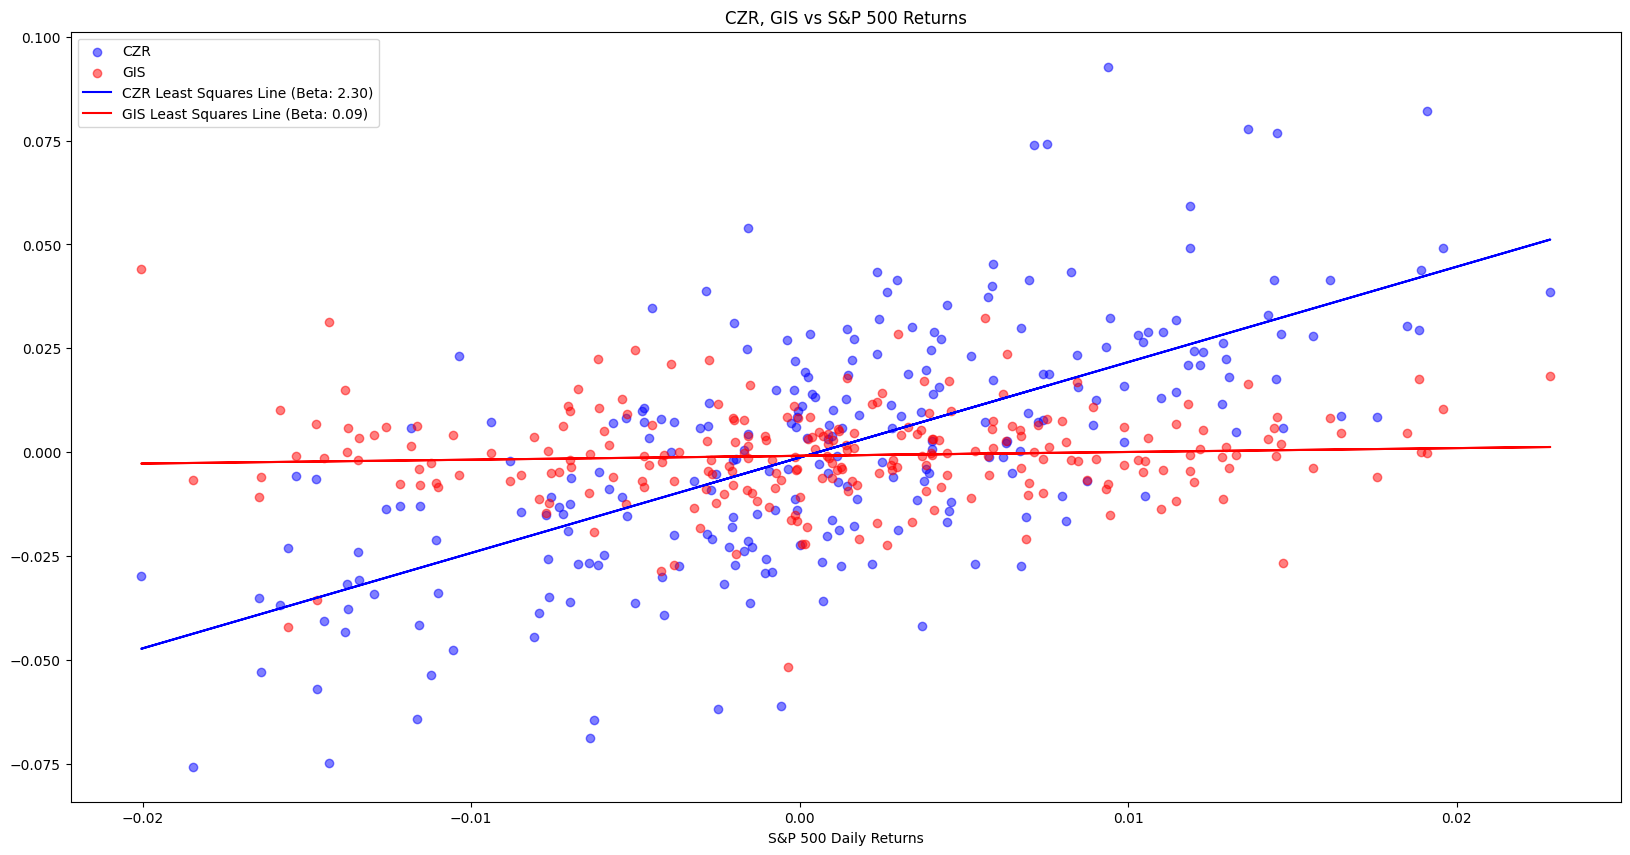

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical price data for Apple Inc. (AAPL) and the S&P 500 index
c1 = yf.download('CZR', start=start_date, end=end_date)['Adj Close']
c2 = yf.download('GIS', start=start_date, end=end_date)['Adj Close']
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
c1 = c1.pct_change().dropna()
c2 = c2.pct_change().dropna()
sp500_returns = sp500.pct_change().dropna()

# Prepare data for linear least squares
x = sp500_returns.values
y = c1.values
y2 = c2.values

# Add a constant term for the intercept
A = np.vstack([x, np.ones(len(x))]).T

# Perform linear least squares
m, b = np.linalg.lstsq(A, y, rcond=None)[0]
m2, b2 = np.linalg.lstsq(A, y2, rcond=None)[0]

plt.figure(figsize=(20, 10))
# Plot the data points and the best-fitting line
plt.scatter(x, y, label='CZR', alpha=0.5, color='blue')
plt.scatter(x, y2, label='GIS', alpha=0.5, color='red')
plt.plot(x, m * x + b, color='blue', label=f'CZR Least Squares Line (Beta: {m:.2f})')
plt.plot(x, m2 * x + b2, color='red', label=f'GIS Least Squares Line (Beta: {m2:.2f})')
plt.xlabel('S&P 500 Daily Returns')
plt.title('CZR, GIS vs S&P 500 Returns')
plt.legend()

plt.show()
